In [1]:
using DifferentialEquations
using Plots
using DelimitedFiles

# Plotting cell trajectories

In [ ]:
Cell_1 = readdlm("Trajectory_Cell_1.txt", ',',  Float64)
Cell_2 = readdlm("Trajectory_Cell_2.txt", ',',  Float64)
Cell_3 = readdlm("Trajectory_Cell_3.txt", ',',  Float64)

Time_1 = readdlm("Trajectory_Time_1.txt", ',',  Float64)
Time_2 = readdlm("Trajectory_Time_2.txt", ',',  Float64)
Time_3 = readdlm("Trajectory_Time_3.txt", ',',  Float64)

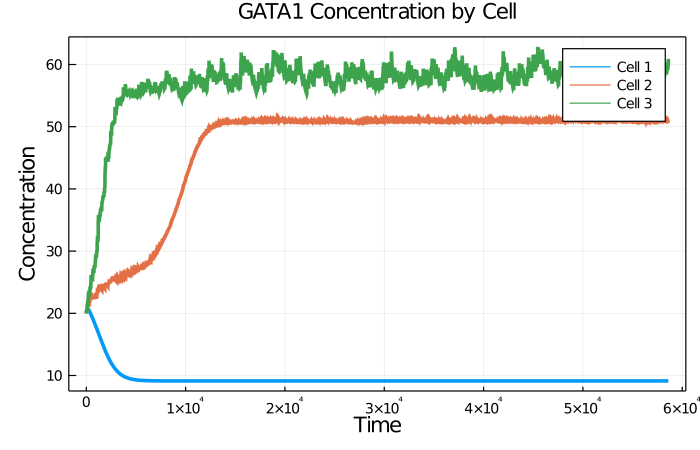

In [11]:
plot(Time_1, Cell_1[:,1], size = (700, 450), label = "Cell 1", 
    title = "GATA1 Concentration by Cell", titlefontsize = 12, guidefontsize = 12,
    framestyle = :box, tickfontsize = 8, legendfontsize = 8, thickness_scaling = 1.2,
    legend =:topright,xaxis = ("Time"), yaxis = ("Concentration"), linewidth = 3.0)
plot!(Time_2, Cell_2[:,1], label = "Cell 2", linewidth = 3.0)
plot!(Time_3, Cell_3[:,1], label = "Cell 3", linewidth = 3.0)

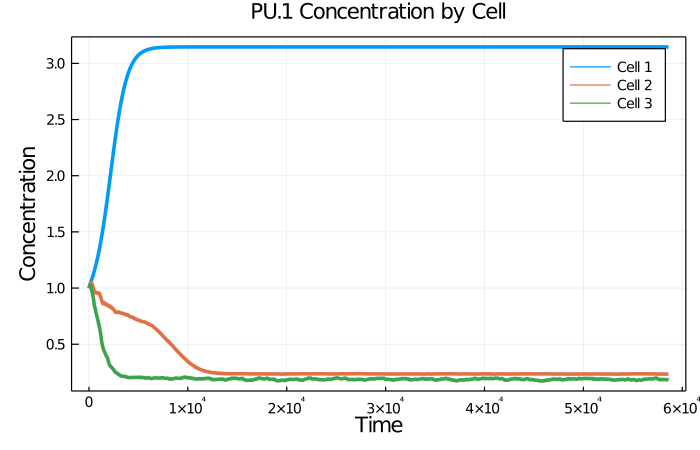

In [4]:
plot(Time_1, Cell_1[:,2], size = (700, 450), label = "Cell 1", 
    title = "PU.1 Concentration by Cell", titlefontsize = 12, guidefontsize = 12,
    framestyle = :box, tickfontsize = 8, legendfontsize = 8, thickness_scaling = 1.2,
    legend =:topright,xaxis = ("Time"), yaxis = ("Concentration"), linewidth = 3.0)
plot!(Time_2, Cell_2[:,2], label = "Cell 2", linewidth = 3.0)
plot!(Time_3, Cell_3[:,2], label = "Cell 3", linewidth = 3.0)

# Plotting distributions of cells

In [ ]:
Prob_by_Cell = readdlm("Topology_3_cells.txt", ',',  Float64)

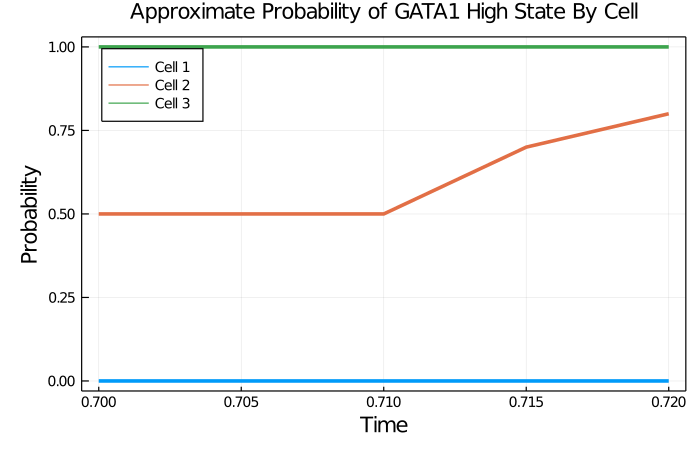

In [8]:
plot(Prob_by_Cell[:,1], Prob_by_Cell[:,2], size = (700, 450), label = "Cell 1", 
    title = "Approximate Probability of GATA1 High State By Cell", titlefontsize = 12, guidefontsize = 12,
    framestyle = :box, tickfontsize = 8, legendfontsize = 8, thickness_scaling = 1.2,
    legend =:topleft,xaxis = ("Time"), yaxis = ("Probability"), linewidth = 3.0)
plot!(Prob_by_Cell[:,1], Prob_by_Cell[:,3], label = "Cell 2", linewidth = 3.0)
plot!(Prob_by_Cell[:,1], Prob_by_Cell[:,4], label = "Cell 3", linewidth = 3.0)

After running for a large number of iterations over a wide range of A0 values, curves can be fitted to the data points using:

In [ ]:
@. model(x, p) = p[1] + (p[2] / (1 + exp((p[3] - x) / p[4])) )
p0 = [-0.001, 1.01, 10.0, 1.0]
fit = curve_fit(model, Prob_by_Cell[:,1], Prob_by_Cell[:,2], p0)